<!--Collapsible Headings-->
## EDA_for_TEXT-DATA_by_Di
Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not 
recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.


In [1]:
import pandas as pd
print(pd.__version__)


2.1.0


In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn, randint, uniform, sample
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn, randint, uniform, sample
from pandas.plotting import scatter_matrix
pd.set_option('display.max_rows', 10)
fig=plt.figure()
import plotly as py
from plotly.offline import iplot
import cufflinks as cf

<Figure size 640x480 with 0 Axes>

In [3]:
py.offline.init_notebook_mode(connected=True)   
cf.go_offline()

<!--Collapsible Headings-->
## Data Import and Procedure



In [4]:
_df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
_df.sample(10)

Clothing ID  Age                                              Title  \
16            1065   34  You need to be at least average height, or taller   
8541           964   41                               Better than expected   
3827           861   69                                                NaN   
9559           820   34                                                NaN   
6419           903   39                                     Still debating   
2341           844   46                                 Perfect fit for xl   
4018           828   51                                     Wanted to love   
3914           460   34            Not for me but seemed like good quality   
16963          993   54                                          Fun skirt   
13270          909   46                                 Great best sweater   

                                             Review Text  Rating  \
16     Material and color is nice.  the leg opening i...       3   
8541   Got this on a whim and boy i'm very pleased! i...       5   
3827   T.la got it right this time. love the fabric. ...       5   
9559   I just got this in the mail and wore it for th...       5   
6419   I tried on the petite in the store and loved i...       5   
2341   I ordered both colors in size xl and they're e...       5   
4018   I so wanted to love this top. i first ordered ...       3   
3914   The romper was really quite and looks just lik...       4   
16963  This skirt fits me like a glove, you must get ...       5   
13270  Wanted to get this sweater in the red but the ...       4   

       Recommended IND  Positive Feedback Count   Division Name  \
16                   1                        2         General   
8541                 1                        0  General Petite   
3827                 1                       12         General   
9559                 1                        1         General   
6419                 1                        0  General Petite   
2341                 1                        0         General   
4018                 0                        0         General   
3914                 1                        2         General   
16963                1                        1         General   
13270                1                        0  General Petite   

      Department Name  Class Name  
16            Bottoms       Pants  
8541          Jackets     Jackets  
3827             Tops       Knits  
9559             Tops     Blouses  
6419             Tops  Fine gauge  
2341             Tops     Blouses  
4018             Tops     Blouses  
3914          Bottoms      Shorts  
16963         Bottoms      Skirts  
13270            Tops  Fine gauge

In [5]:
_df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
_df_01=_df.drop(columns=['Title','Clothing ID'],axis=1)

In [7]:
_df_01

Age                                        Review Text  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 8 columns]

In [8]:
_df_02=_df_01.dropna(subset=['Division Name','Department Name','Review Text'])

In [9]:

_df_02.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [10]:
_df_02.isna().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [11]:
' '.join(_df_02['Review Text'].tolist())[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt

<!--Collapsible Headings-->
## Text Cleaning
This portion is the pre-conditioning part for the review 


In [12]:
_contractions = { 
"wanna":"want to",
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [13]:
def _cont_to_exp(x):
    if type(x) is str:
        x=x.replace('\\','')
        for key in _contractions:
            value=_contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [14]:
x="I wanna fuck you"

In [15]:
print(_cont_to_exp(x))

I want to fuck you


In [16]:
%%time
_df_02['Review Text']=_df_02['Review Text'].apply(lambda x:_cont_to_exp(x))

CPU times: total: 609 ms
Wall time: 858 ms


In [17]:
_df_02.sample(10)

Age                                        Review Text  Rating  \
3579    33  Beautiful dress. not lined, but the fabric is ...       5   
1240    46  I usually wear a size xs or s in retailer tops...       1   
19499   43  I love the top for its minimal fuss - no ironi...       4   
9808    58  I was leery when i ordered this as i read the ...       5   
9499    61  This dress is beautiful. it has lovely colors ...       4   
14663   44  I love wearing this so much! i wear it with le...       5   
20128   35  I'd been waiting to snatch up this jumpsuit as...       1   
18261   62  I do not know what it is about this top but i ...       4   
21757   47  This is my new favorite dress. it is a lovely ...       5   
1560    33  I've passed this dress by a number of times on...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
3579                 1                        1         General   
1240                 0                        0         General   
19499                1                        0  General Petite   
9808                 1                        3       Initmates   
9499                 1                        0  General Petite   
14663                1                        0         General   
20128                0                        0  General Petite   
18261                1                        3         General   
21757                1                        0  General Petite   
1560                 1                        2         General   

      Department Name  Class Name  
3579          Dresses     Dresses  
1240             Tops       Knits  
19499            Tops  Fine gauge  
9808         Intimate      Lounge  
9499          Dresses     Dresses  
14663            Tops       Knits  
20128         Bottoms       Pants  
18261            Tops       Knits  
21757         Dresses     Dresses  
1560          Dresses     Dresses

In [18]:
print(''.join(_df_02['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortableLove this dress!  it is sooo pretty.  i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it cI love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!This shirt is ve

<!--Collapsible Headings-->
## Features Engineering



In [19]:
#!pip install nltk


In [20]:
from textblob import TextBlob

applying sentiment feature from textblob to the 'Review Text' column

In [21]:
_df_02["Polarity"]=_df_02['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [22]:
_df_02['Review_len']=_df_02['Review Text'].apply(lambda x: len(x))

In [23]:
_df_02['word_length']=_df_02['Review Text'].apply(lambda x: len(x.split()))

In [24]:
_df_02.head(10)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   
5   49  I love tracy reese dresses, but this one is no...       2   
6   39  I aded this in my basket at hte last mintue to...       5   
7   39  I ordered this in carbon for store pick up, an...       4   
8   24  I love this dress. i usually get an xs but it ...       5   
9   34  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   
5                0                        4         General         Dresses   
6                1                        1  General Petite            Tops   
7                1                        4  General Petite            Tops   
8                1                        0         General         Dresses   
9                1                        0         General         Dresses   

  Class Name  Polarity  Review_len  word_length  
0  Intimates  0.633333          53            8  
1    Dresses  0.339583         306           65  
2    Dresses  0.073675         500           98  
3      Pants  0.550000         125           23  
4    Blouses  0.512891         192           36  
5    Dresses  0.178750         488           98  
6      Knits  0.133750         496          101  
7      Knits  0.171635         483           98  
8    Dresses  0.002500         166           34  
9    Dresses  0.204200         361           73

In [25]:
def avg_word_cnt(x):
    word=x.split()
    cnt=0
    for F in word:
        cnt=cnt+len(F)
        
    return cnt/len(word)
x='are you mine?'
print(avg_word_cnt(x))

3.6666666666666665


In [26]:
_df_02['avg_word_len']=_df_02["Review Text"].apply(lambda x: avg_word_cnt(x))

In [27]:
_df_02.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  Review_len  word_length  avg_word_len  
0  Intimates  0.633333          53            8      5.750000  
1    Dresses  0.339583         306           65      3.646154  
2    Dresses  0.073675         500           98      4.112245  
3      Pants  0.550000         125           23      4.478261  
4    Blouses  0.512891         192           36      4.361111

<!--Collapsible Headings-->
## Distribution of Sentiment Polarity


In [28]:
_df_02["avg_word_len"].iplot(kind='hist',bins=50,xTitle='sentiment',yTitle='Count',title="Sentiment Polarity Count")

<!--Collapsible Headings-->
## Distribution of reviewers age and reveiwers rating



In [29]:
_df_02["Age"].iplot(kind='hist',bins=50,xTitle="Age",yTitle="Count",title="Reviewers Age")

In [30]:
_df_02["Rating"].iplot(kind='hist',xTitle='Rating',yTitle='Count',title="Reviewer's Rating")

<!--Collapsible Headings-->
## Distribution of Reviewers Text Length and Word lenth 



In [31]:
_df_02["Review_len"].iplot(kind='hist',bins=50,xTitle="Review Length",yTitle='Count',title="Reviewer's text lenght")

In [32]:
_df_02["avg_word_len"].iplot(kind='hist',xTitle="Average Review length",yTitle="Count",title="Average Reviewer's text length")

In [33]:
_df_02['word_length'].iplot(kind='hist',xTitle="Wrod length",yTitle="Count")

In [34]:
_df_02.head(5)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  Review_len  word_length  avg_word_len  
0  Intimates  0.633333          53            8      5.750000  
1    Dresses  0.339583         306           65      3.646154  
2    Dresses  0.073675         500           98      4.112245  
3      Pants  0.550000         125           23      4.478261  
4    Blouses  0.512891         192           36      4.361111

<!--Collapsible Headings-->
## Distribution of Department , division and class



In [35]:
_df_02['Department Name'].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [36]:
_df_02.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3662         3662    3662             3662   
Dresses           6145         6145    6145             6145   
Intimate          1653         1653    1653             1653   
Jackets           1002         1002    1002             1002   
Tops             10048        10048   10048            10048   
Trend              118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  Polarity  \
Department Name                                                                 
Bottoms                             3662           3662        3662      3662   
Dresses                             6145           6145        6145      6145   
Intimate                            1653           1653        1653      1653   
Jackets                             1002           1002        1002      1002   
Tops                               10048          10048       10048     10048   
Trend                                118            118         118       118   

                 Review_len  word_length  avg_word_len  
Department Name                                         
Bottoms                3662         3662          3662  
Dresses                6145         6145          6145  
Intimate               1653         1653          1653  
Jackets                1002         1002          1002  
Tops                  10048        10048         10048  
Trend                   118          118           118

In [37]:
_df_02["Department Name"].value_counts().iplot(kind='bar',xTitle='Department',yTitle='Count',title='Bar Chart of department names')

In [38]:
_df_02['Division Name'].value_counts().iplot(kind='bar',xTitle='Division Name',yTitle='Count',title='Bar chart for divisons')

In [39]:
_df_02['Class Name'].value_counts().iplot(kind='bar',xTitle='Division Name',yTitle='Count',title='Bar chart for divisons')

<!--Collapsible Headings-->
## Unigram , bigram and trigrams
number of sequence in a sentence. where uni example : this , is , an , EDA 
bigram example : this is , is an , an EDA 
trigram example : this is an , is an EDA


<!--Collapsible Headings-->
## 
Unigram


In [40]:

from sklearn.feature_extraction.text import CountVectorizer

In [41]:
def get_top_n_words_unigram(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [42]:
words=get_top_n_words_unigram(_df_02["Review Text"],20)

In [43]:
words

[('the', 76159),
 ('it', 49273),
 ('and', 49008),
 ('is', 38103),
 ('this', 25758),
 ('to', 24578),
 ('in', 20722),
 ('but', 16549),
 ('not', 16376),
 ('on', 15325),
 ('for', 13994),
 ('of', 13428),
 ('was', 12923),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11027),
 ('dress', 10567),
 ('that', 10011),
 ('have', 9077)]

In [44]:
_df_unigram=pd.DataFrame(words,columns=['Unigram', 'Frequency'])
_df_unigram=_df_unigram.set_index('Unigram')
_df_unigram.iplot(kind='bar',xTitle='Unigram',yTitle='Frequency',title='Unigram chart')


<!--Collapsible Headings-->
## 
Bigram


In [45]:
def get_top_n_words_bigrams(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [46]:
words_bi=get_top_n_words_bigrams(_df_02['Review Text'],20)

In [47]:
words_bi

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5613),
 ('this dress', 4758),
 ('on the', 4337),
 ('of the', 3933),
 ('and it', 3723),
 ('it was', 3287),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2655),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117)]

In [48]:
_df_bigram= pd.DataFrame(words_bi,columns=['Bigram','Frequency'])
_df_bigram=_df_bigram.set_index('Bigram')
_df_bigram.iplot(kind='bar',xTitle='Bigram', yTitle='Frequency',title='Bigram chart of Review text column')

<!--Collapsible Headings-->
## 
Trigram



In [49]:
def get_top_n_words_trigrams(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [50]:
words_tri=get_top_n_words_trigrams(_df_02['Review Text']   ,20)


In [51]:
words_tri

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 550),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518)]

In [52]:
_df_trigram=pd.DataFrame(words_tri,columns=['Trigram', ' Frequency'])
_df_trigram=_df_trigram.set_index('Trigram')
_df_trigram.iplot(kind='bar',xTitle='Trigram', yTitle="Frequency", title=" Top 20 Trigram chart of Review text column")

## Distribution of Top 20 Parts-of-Speech POS tags 


In [53]:
import nltk

In [54]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('tagsets')

In [55]:
_blob=TextBlob(str(_df_02['Review Text']))

In [56]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [57]:
pos_df=pd.DataFrame(_blob.tags,columns=['words','pos'])
pos_df

words  pos
0             0   CD
1    Absolutely   RB
2     wonderful   JJ
3         silky   NN
4           and   CC
..          ...  ...
106        Text  NNP
107      Length  NNP
108       22628   CD
109       dtype   NN
110      object   NN

[111 rows x 2 columns]

In [58]:
pos_df_count=pos_df['pos'].value_counts()
pos_df_count

pos
NN     23
DT     15
JJ     13
CD     11
PRP     8
       ..
VBD     4
TO      3
NNS     2
VB      2
PDT     1
Name: count, Length: 16, dtype: int64

In [59]:
pos_df_count.iplot(kind='bar')

## Bivariate analysis

In [60]:
_df_02.head(5)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  Review_len  word_length  avg_word_len  
0  Intimates  0.633333          53            8      5.750000  
1    Dresses  0.339583         306           65      3.646154  
2    Dresses  0.073675         500           98      4.112245  
3      Pants  0.550000         125           23      4.478261  
4    Blouses  0.512891         192           36      4.361111

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

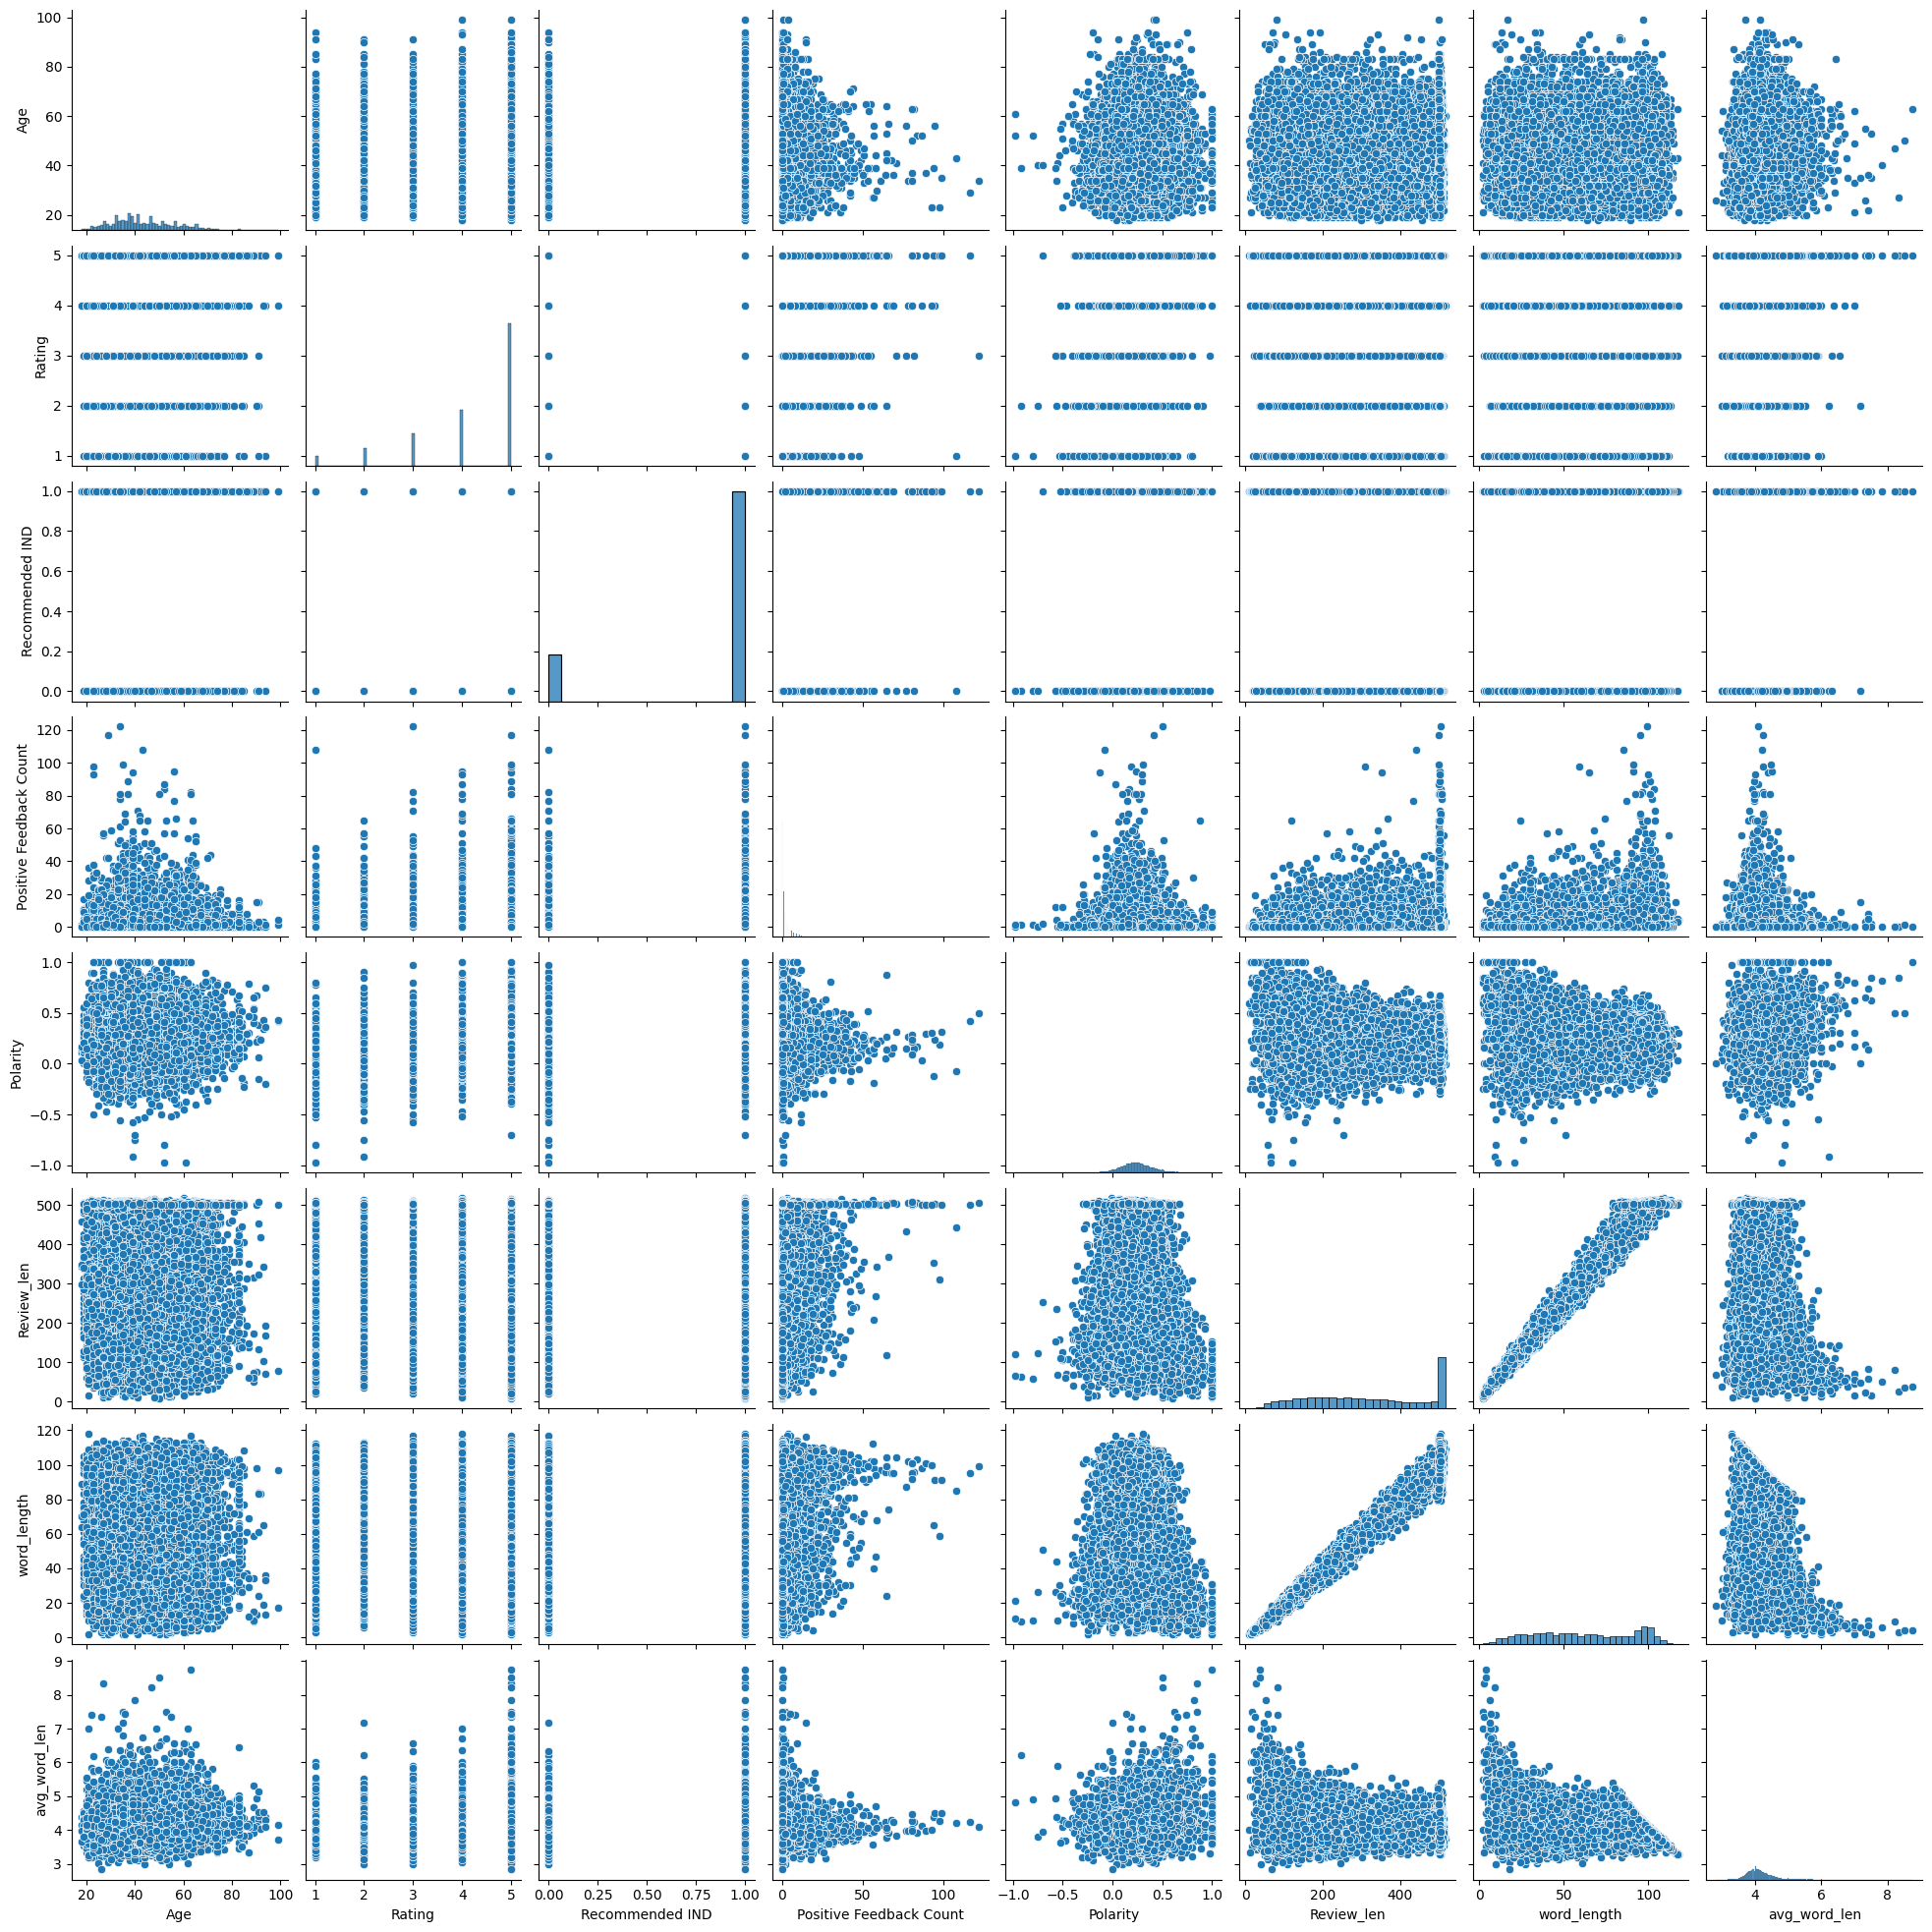

In [61]:
sns.pairplot(_df_02)

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

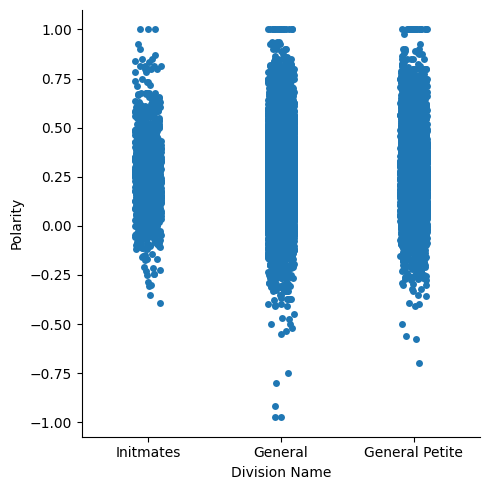

In [62]:
sns.catplot(x='Division Name',y='Polarity',data=_df_02)

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

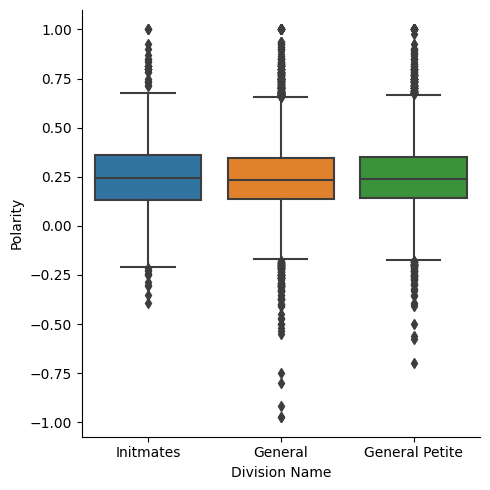

In [63]:
sns.catplot(x='Division Name',y='Polarity',data=_df_02,kind='box')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

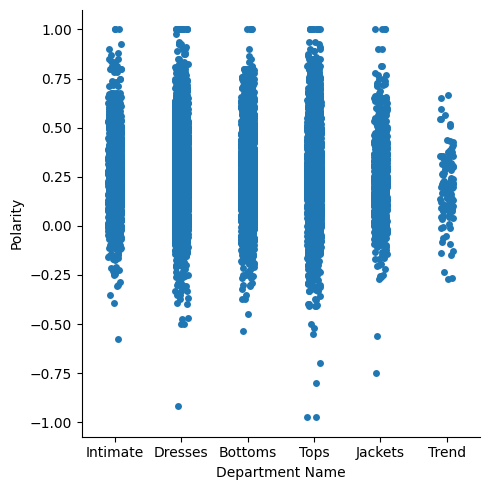

In [64]:
sns.catplot(x='Department Name',y='Polarity',data=_df_02)

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

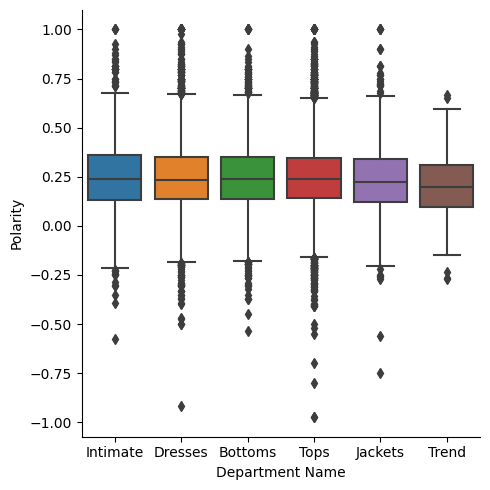

In [65]:
sns.catplot(x='Department Name',y='Polarity',data=_df_02,kind='box')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

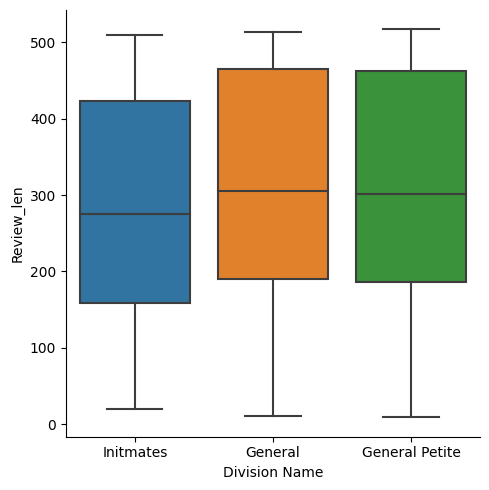

In [66]:

sns.catplot(x='Division Name',y='Review_len',data=_df_02,kind='box')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futur

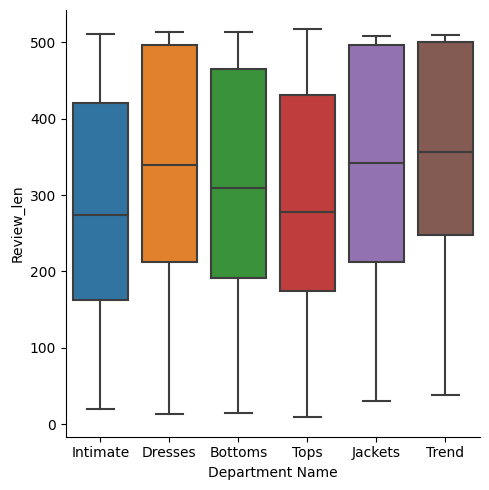

In [67]:
sns.catplot(x='Department Name',y='Review_len',data=_df_02,kind='box')

## Distribution of Sentiment Polarity of Reviews Based on the Recommendation 

In [68]:
import plotly.express as px
import plotly.graph_objects as go

In [69]:
_df_02.head(5)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  Review_len  word_length  avg_word_len  
0  Intimates  0.633333          53            8      5.750000  
1    Dresses  0.339583         306           65      3.646154  
2    Dresses  0.073675         500           98      4.112245  
3      Pants  0.550000         125           23      4.478261  
4    Blouses  0.512891         192           36      4.361111

In [101]:
_x1=_df_02[_df_02['Recommended IND']==1]['Polarity']
_x0=_df_02[_df_02['Recommended IND']==0]['Polarity']

In [102]:
print(_x1)

0        0.633333
1        0.339583
3        0.550000
4        0.512891
6        0.133750
           ...   
23479    0.153443
23481    0.552667
23482    0.091667
23484    0.155556
23485    0.413889
Name: Polarity, Length: 18527, dtype: float64


In [103]:
type(_x1)

pandas.core.series.Series

In [104]:
trace0 = go.Histogram(x = _x0, name = 'Col_x0', opacity = 0.7)
trace1 = go.Histogram(x = _x1, name = 'Col_x1', opacity = 0.7)

data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Sentiment Polarity of Reviews Based on the Recommendation')

fig = go.Figure(data = data, layout = layout)

iplot(fig)

## Distribution of Ratings Based on the Recommendation 

In [94]:
x1 = _df_02[_df_02['Recommended IND']==1]['Rating']

x0 = _df_02[_df_02['Recommended IND']==0]['Rating']


In [99]:
print(x1)

0        4
1        5
3        5
4        5
6        5
        ..
23479    5
23481    5
23482    3
23484    3
23485    5
Name: Rating, Length: 18527, dtype: int64


In [95]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [96]:
data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futur

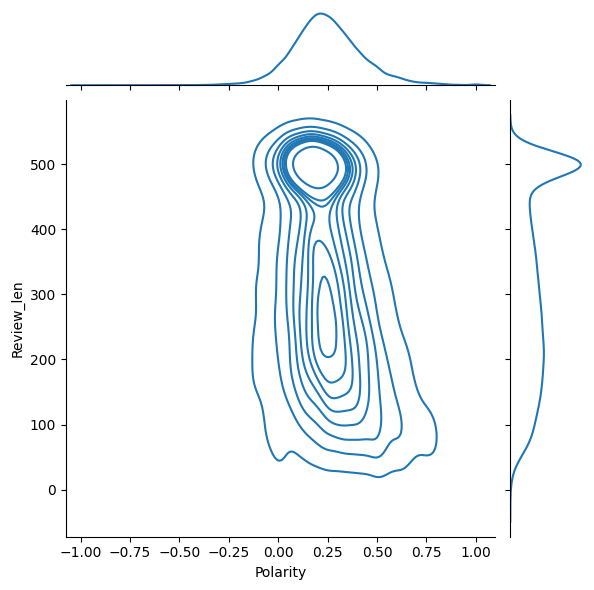

In [107]:


sns.jointplot(x='Polarity',y='Review_len',data=_df_02,kind='kde')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futur

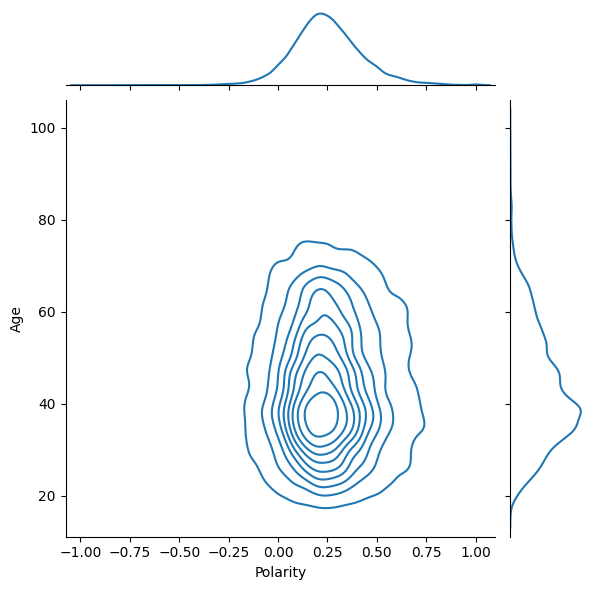

In [108]:


sns.jointplot(x='Polarity',y='Age',data=_df_02,kind='kde')